In this notebook, I want to build MSM with the ALADipeptide data from the example data set.

-- figure out format of the input data and how they are handled by the featurizer

In [66]:
from __future__ import print_function
import os
%matplotlib inline
from matplotlib.pyplot import *
from msmbuilder.featurizer import SuperposeFeaturizer
from msmbuilder.example_datasets import AlanineDipeptide
from msmbuilder.cluster import KCenters
from msmbuilder.msm import MarkovStateModel

import matplotlib.pyplot as plt

In [62]:
print(AlanineDipeptide.description())
dataset = AlanineDipeptide().get()
trajectories = dataset.trajectories #mdtraj objects
topology = trajectories[0].topology

#index atoms for superposition
indices = [atom.index for atom in topology.atoms if atom.element.symbol in ['C', 'O','N']] 
featurizer = SuperposeFeaturizer(indices, trajectories[0][0])#use the first mdtraj as refrence
sequences = featurizer.transform(trajectories)#returns cartesian distances between the indexed atoms in every frame
#this is done with refernece to their respective counterpart in the first frame

The dataset consists of ten 10ns trajectories of of alanine dipeptide,
simulated using OpenMM 6.0.1 (CUDA platform, NVIDIA GTX660) with the
AMBER99SB-ILDN force field at 300K (langevin dynamics, friction coefficient
of 91/ps, timestep of 2fs) with GBSA implicit solvent. The coordinates are
saved every 1ps. Each trajectory contains 9,999 snapshots.

The dataset, including the script used to generate the dataset
is available on figshare at

http://dx.doi.org/10.6084/m9.figshare.1026131



In [63]:
sequences[0][1]

array([ 0.03700333,  0.01438697,  0.05054713,  0.0103136 ,  0.02201509,
        0.03839818,  0.01540395,  0.03276858,  0.01436706,  0.04407318], dtype=float32)

In [64]:
assignments = KCenters(n_clusters=6).fit_predict(sequences)

(array([ 4513.,     0.,     0.,  3687.,  1615.,   184.]),
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ,  2.66666667,
         3.33333333,  4.        ]),
 <a list of 6 Patch objects>)

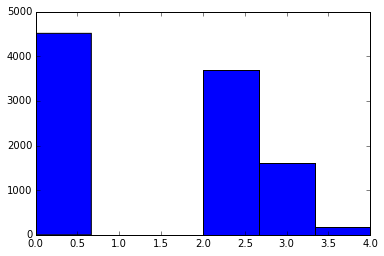

In [70]:
for ii in s

In [34]:
msmts0, msmts1 = {}, {}
lag_times = [1, 10, 20, 30, 40]
n_states = [4, 8, 16, 32, 64]

for n in n_states:
    msmts0[n] = []
    msmts1[n] = []
    for lag_time in lag_times:
        assignments = KCenters(n_clusters=n).fit_predict(sequences)
        msm = MarkovStateModel(lag_time=lag_time, verbose=False).fit(assignments)
        timescales = msm.timescales_
        msmts0[n].append(timescales[0])
        msmts1[n].append(timescales[1])
        print('n_states=%d\tlag_time=%d\ttimescales=%s' % (n, lag_time, timescales[0:2]))
    print()

n_states=4	lag_time=1	timescales=[ 71.86164344   2.65402092]
n_states=4	lag_time=10	timescales=[ 178.45875872    4.9046249 ]
n_states=4	lag_time=20	timescales=[ 204.80504947    5.95377729]
n_states=4	lag_time=30	timescales=[ 215.99155196    6.18496211]
n_states=4	lag_time=40	timescales=[ 224.19739379    8.40648572]

n_states=8	lag_time=1	timescales=[ 48.98360966   2.07146593]
n_states=8	lag_time=10	timescales=[ 152.91603902    5.46275802]
n_states=8	lag_time=20	timescales=[ 199.08624209    5.81460991]
n_states=8	lag_time=30	timescales=[ 202.87742426    7.49076792]
n_states=8	lag_time=40	timescales=[ 211.25690505    8.46887259]

n_states=16	lag_time=1	timescales=[ 118.75351278    3.62856109]
n_states=16	lag_time=10	timescales=[ 207.00483327    6.32502182]
n_states=16	lag_time=20	timescales=[ 217.10029007    6.24738663]
n_states=16	lag_time=30	timescales=[ 227.52020581    8.02427291]
n_states=16	lag_time=40	timescales=[ 230.65994024    9.78017484]

n_states=32	lag_time=1	timescales=[ 134

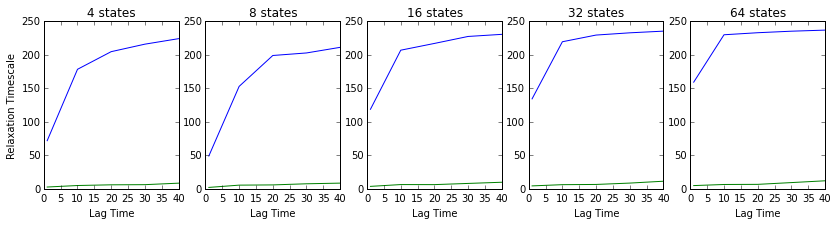

In [35]:
figure(figsize=(14,3))

for i, n in enumerate(n_states):
    subplot(1,len(n_states),1+i)
    plot(lag_times, msmts0[n])
    plot(lag_times, msmts1[n])
    if i == 0:
        ylabel('Relaxation Timescale')
    xlabel('Lag Time')
    title('%d states' % n)

show()
